# 1. Biểu đồ biểu diễn phân bổ các bài báo theo lĩnh vực QML, QO, QB

In [ ]:
#REMEMBER TO ADD RQ1 folder to your drive(add shortcut) before mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read QMOB.csv file
QMD_df = pd.read_csv("/content/drive/MyDrive/RQ1/QMOB_SecondRound_2025.xlsx - QMD-Final.csv")

## Thêm một pie chart để so sánh với bar chart

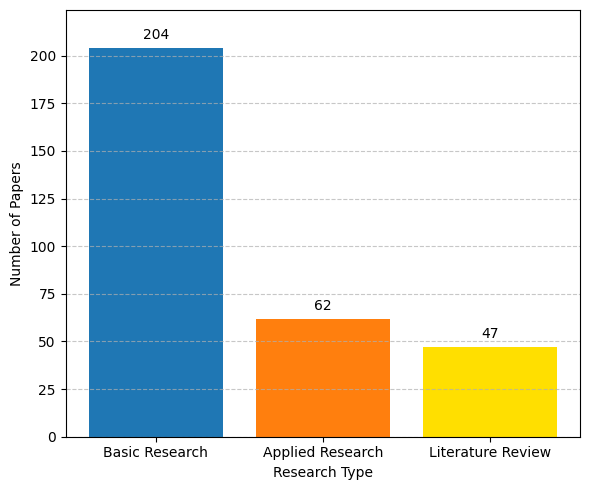

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#ffdf00']

# Get the count of each category
research_counts = QMD_df['Research Category'].value_counts()

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(research_counts.index, research_counts.values, color=colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 3, f'{int(height)}', ha='center', va='bottom')

# Labels
plt.xlabel('Research Type')
plt.ylabel('Number of Papers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('')


# Show plot
plt.tight_layout()
plt.show()

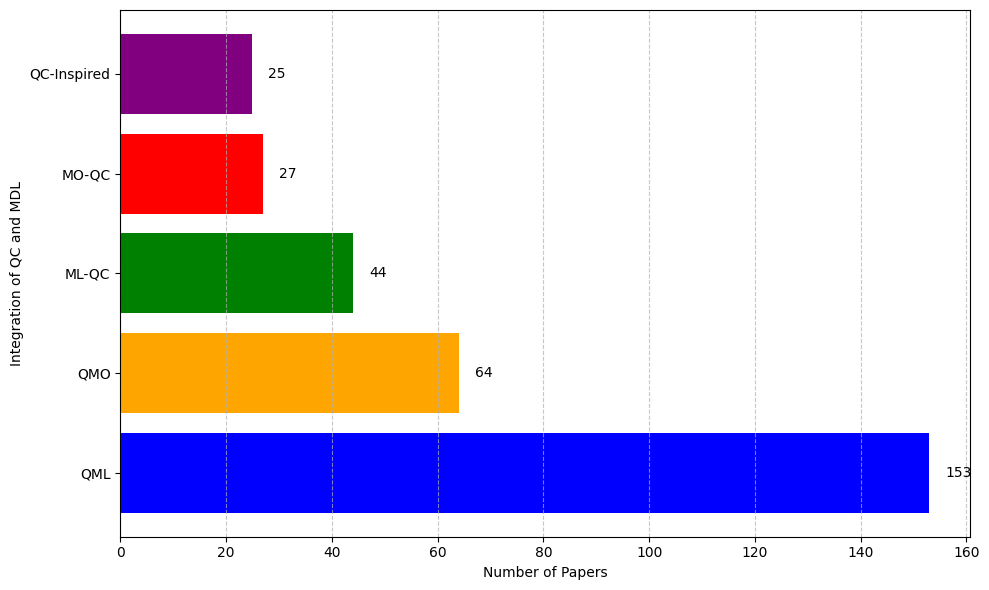

In [ ]:
classifier_count = QMD_df['Article Classifier'].value_counts()
classifier_count_sorted = classifier_count.sort_values(ascending = False)
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize = (10, 6))
bars = plt.barh(classifier_count_sorted.index, classifier_count_sorted.values, color=colors)

# Add value labels next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height()/2.0, f'{int(width)}', va='center')

# Labels
plt.xlabel('Number of Papers')
plt.ylabel('Integration of QC and MDL')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('')

# Show plot
plt.tight_layout()
plt.show()


# 2. Biểu đồ biểu diễn phân bổ bài báo theo khu vực địa lý/quốc gia

# Thử với giải pháp chia làm các khu vực địa lý: Nort America (USA, Canada), Europe (Germany, UK, Italy, Spain,...), Asia (India, Japan, South Korea,...), Australia,...thêm 1 pie chart cho khu vực địa lý
# Nghiên cứu công cụ CiteSpace để visualize country collaboration: http://cluster.cis.drexel.edu/~cchen/citespace/
Bài báo sử dụng: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10167529&tag=1



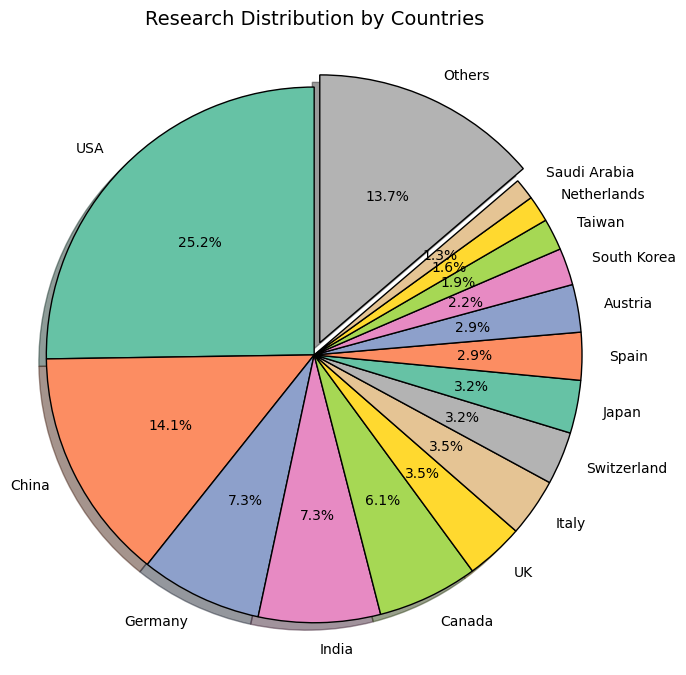

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = QMD_df['Country'].value_counts()

top_15 = country_counts.nlargest(15)
others_count = country_counts[~country_counts.index.isin(top_15.index)].sum()
top_15['Others'] = others_count

palette = sns.color_palette('Set2', len(top_15))

explode = [0.05 if country == 'Others' else 0 for country in top_15.index]

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(top_15, labels=top_15.index, autopct='%1.1f%%', startangle=90, colors=palette,
       explode=explode, shadow= True, wedgeprops={'edgecolor': 'black'})
plt.title('Research Distribution by Countries', fontsize=14)

plt.axis('equal')

plt.tight_layout()

In [ ]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 15.5 MB/s eta 0:00:00


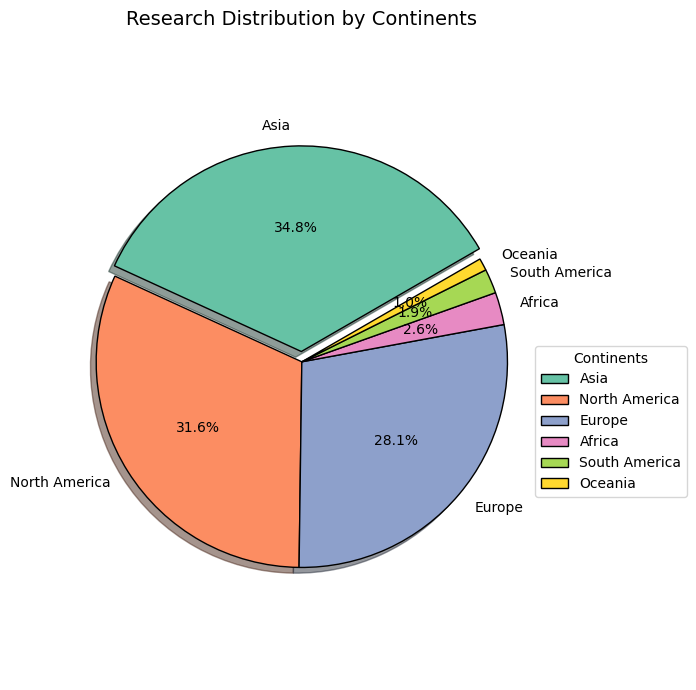

In [ ]:
import pycountry_convert as pc
import matplotlib.pyplot as plt
import seaborn as sns
def get_continent(country_name):
    if country_name =='UK':
       return 'Europe'
    if country_name =='Korea':
      return 'Asia'
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continents = {
            'AF': 'Africa',
            'NA': 'North America',
            'OC': 'Oceania',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'SA': 'South America'
        }
        return continents[continent_code]
    except:
        return country_name


QMD_df['continent'] = QMD_df['Country'].apply(get_continent)
continent_count = QMD_df['continent'].value_counts()

palette = sns.color_palette('Set2', len(continent_count))

plt.figure(figsize=(7, 7))
explode = [0.05 if continent == continent_count.idxmax() else 0 for continent in continent_count.index]  # Tách phần lớn nhất

plt.pie(continent_count, labels=continent_count.index, autopct='%1.1f%%', startangle=30, colors=palette,
        explode=explode, shadow = True, wedgeprops={'edgecolor': 'black'})

plt.title('Research Distribution by Continents', fontsize=14)

plt.axis('equal')

plt.legend(continent_count.index, title='Continents', loc='center left', bbox_to_anchor=(1.0, 0.4))
plt.tight_layout()
plt.show()

# 3. Biểu đồ biểu diễn phân bổ bài báo theo loại nghiên cứu

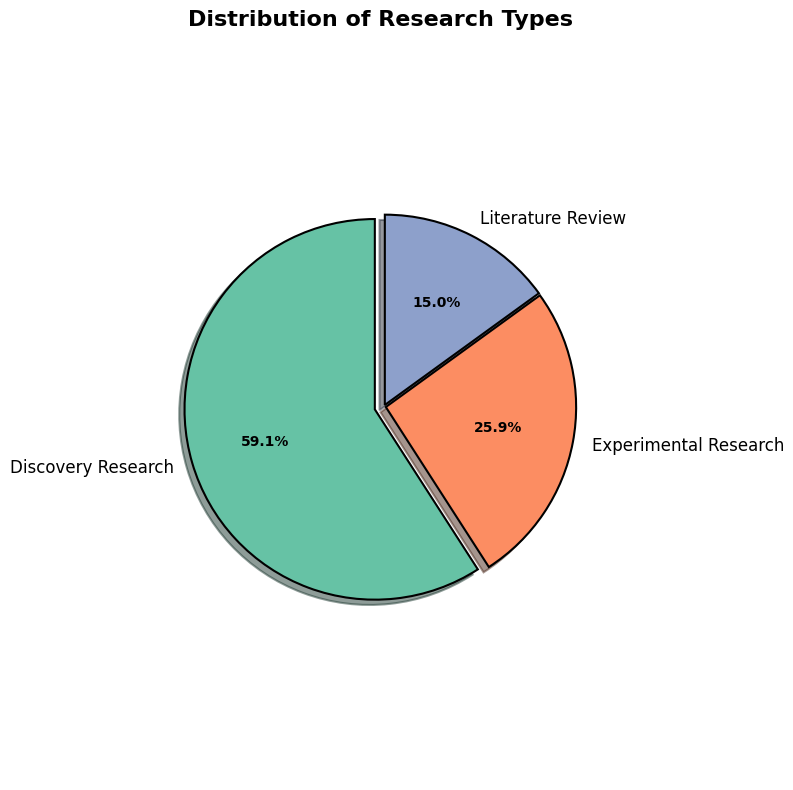

In [ ]:
# Value counts for Research Type
type_counts = QMD_df['Research Type'].value_counts()

# Create a pie chart
palette = sns.color_palette('Set2', len(type_counts))
plt.figure(figsize=(8, 8))

# Add explode effect to highlight different slices
explode = [0.05 if count == max(type_counts) else 0.01 for count in type_counts]

# Plot pie chart
wedges, texts, autotexts = plt.pie(type_counts,
                                   labels=type_counts.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=palette,
                                   explode=explode,
                                   shadow=True,  # Add shadow
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Thicker edge
                                   textprops={'fontsize': 12})  # Increase label font size

# Set percentage text properties
for autotext in autotexts:
    autotext.set_size(10)
    autotext.set_weight('bold')

# Add title
plt.title('Distribution of Research Types', fontsize=16, fontweight='bold')

# Ensure pie is a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

# 4. Biểu đồ biểu diễn bài báo phân loại theo chất lượng

# Thêm biểu đồ phân bổ các bài báo đối với các Journal (Ko dùng Conference). Giống bài này: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9813715
# Xem lại tên biểu đồ cho chính xác

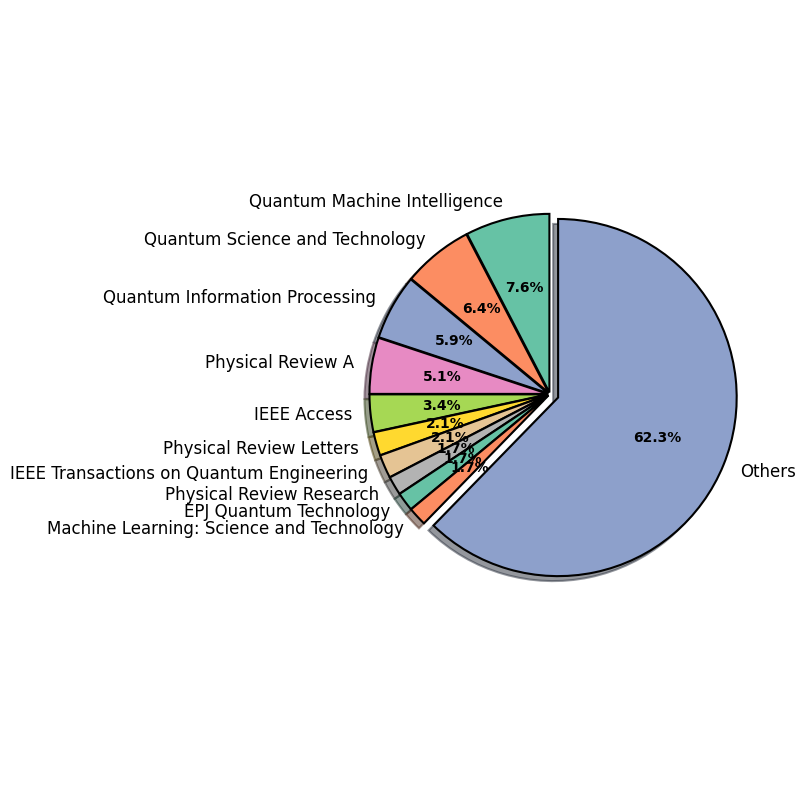

In [ ]:
QMD_df.fillna('NA', inplace=True)
filter_data_journal = QMD_df[QMD_df["Journal Rank"] != "NA"]
journal_data_count = filter_data_journal['Journal/Conf Name'].value_counts()

top_10 = journal_data_count.nlargest(10)
others_count = journal_data_count[~journal_data_count.index.isin(top_10.index)].sum()
top_10['Others'] = others_count

palette = sns.color_palette('Set2', len(top_10))

explode = [0.05 if journal == 'Others' else 0.01 for journal in top_10.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Adjust the size to be similar to the first chart
wedges, texts, autotexts = plt.pie(top_10,
                                   labels=top_10.index,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=palette,
                                   explode=explode,
                                   shadow=True,  # Add shadow like the first pie
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Thicker edge
                                   textprops={'fontsize': 12})  # Adjust label font size

# Set percentage text properties
for autotext in autotexts:
    autotext.set_size(10)
    autotext.set_weight('bold')

# Add a title to the chart
plt.title('', fontsize=16, fontweight='bold')

# Ensure the pie chart is a circle
plt.axis('equal')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


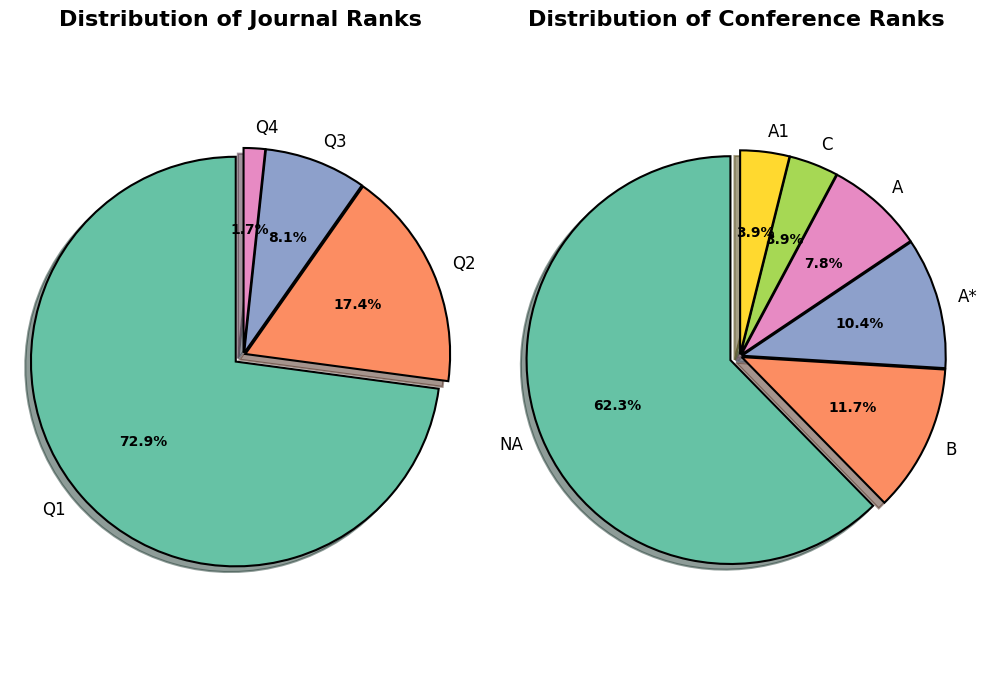

In [ ]:
# Filter data
QMD_df.fillna('NA', inplace=True)

# First pie chart: Journal Rank
filtered_data_journal = QMD_df[QMD_df["Journal Rank"] != "NA"]
rank_counts_journal = filtered_data_journal["Journal Rank"].value_counts()

# Second pie chart: Conference Rank
filtered_data_conf = QMD_df[QMD_df["Journal Rank"] == "NA"]
rank_counts_conf = filtered_data_conf["Conf Rank"].value_counts()

# Create color palettes
palette_journal = sns.color_palette('Set2', len(rank_counts_journal))
palette_conf = sns.color_palette('Set2', len(rank_counts_conf))

# Add explode effect (slightly larger for largest slice)
explode_journal = [0.05 if count == max(rank_counts_journal) else 0.01 for count in rank_counts_journal]
explode_conf = [0.05 if count == max(rank_counts_conf) else 0.01 for count in rank_counts_conf]

# Create subplots for side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))

# Pie chart for Journal Rank
wedges_journal, texts_journal, autotexts_journal = ax1.pie(
    rank_counts_journal,
    labels=rank_counts_journal.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette_journal,
    explode=explode_journal,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)
ax1.set_title("Distribution of Journal Ranks", fontsize=16, fontweight='bold')
for autotext in autotexts_journal:
    autotext.set_size(10)
    autotext.set_weight('bold')

# Pie chart for Conference Rank
wedges_conf, texts_conf, autotexts_conf = ax2.pie(
    rank_counts_conf,
    labels=rank_counts_conf.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette_conf,
    explode=explode_conf,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)
ax2.set_title("Distribution of Conference Ranks", fontsize=16, fontweight='bold')
for autotext in autotexts_conf:
    autotext.set_size(10)
    autotext.set_weight('bold')

# Ensure pie charts are circular
ax1.axis('equal')
ax2.axis('equal')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


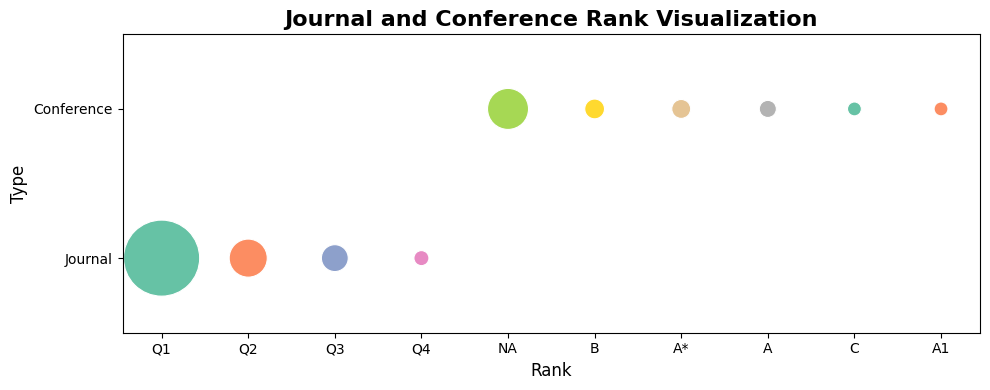

In [ ]:
QMD_df.fillna('NA', inplace=True)

# Filter data for Journal Rank and Conference Rank
filtered_data_journal = QMD_df[QMD_df["Journal Rank"] != "NA"]
rank_counts_journal = filtered_data_journal["Journal Rank"].value_counts()

filtered_data_conf = QMD_df[QMD_df["Journal Rank"] == "NA"]
rank_counts_conf = filtered_data_conf["Conf Rank"].value_counts()

# Bubble chart data
bubble_data = pd.DataFrame({
    'Rank': list(rank_counts_journal.index) + list(rank_counts_conf.index),
    'Type': ['Journal'] * len(rank_counts_journal) + ['Conference'] * len(rank_counts_conf),
    'Count': list(rank_counts_journal.values) + list(rank_counts_conf.values)
})

# Create color palette
palette = sns.color_palette('Set2', len(bubble_data))

# Create the bubble plot using seaborn
plt.figure(figsize=(10, 4))

bubble_chart = sns.scatterplot(
    data=bubble_data,
    x='Rank',
    y='Type',
    size='Count',
    hue='Rank',
    sizes=(100, 3000),
    palette=palette,
    legend=False
)

plt.ylim(-0.5, 1.5)

# Add titles and labels
plt.title('Journal and Conference Rank Visualization', fontsize=16, fontweight='bold')
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Nghiên cứu thử đổi chiều bubbles của Conferences
# Điều chỉnh lại màu cho khớp với biểu đồ pie chart bên trên

# 5. Biểu đồ biểu diễn phân bổ bài báo/chất lượng nghiên cứu theo năm

# Thêm line để nối các đỉnh của bar chart
## Thêm biểu đồ các bài báo Q1, Q2 của Journals và Conference có rank theo năm, có thể tích hợp luôn vào biểu đồ bài báo theo năm chung.

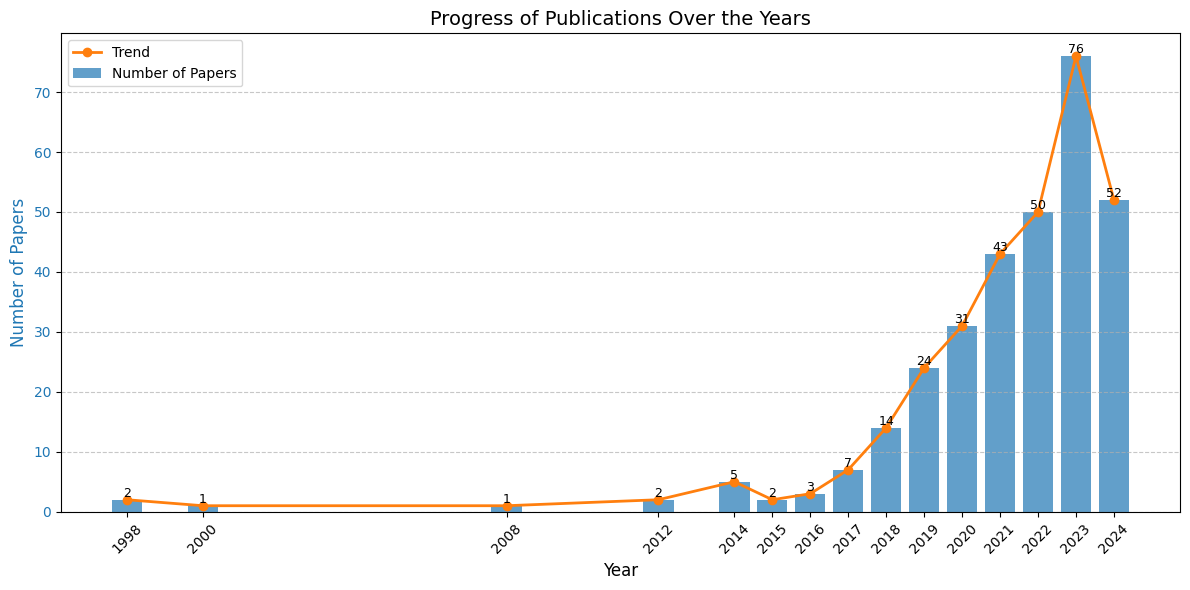

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

QMD_df['Pub Year'] = QMD_df['Pub Year'].astype(int)

year_counts = QMD_df['Pub Year'].value_counts().sort_index()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))


bar_colors = '#1f77b4'  # Màu xanh dương
ax1.bar(year_counts.index, year_counts.values, color=bar_colors, alpha=0.7, label='Number of Papers')

line_color = '#ff7f0e'  # Màu cam
ax1.plot(year_counts.index, year_counts.values, color=line_color, marker='o', markersize=6, linestyle='-', linewidth=2, label='Trend')


ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Papers', color=bar_colors, fontsize=12)
ax1.tick_params(axis='y', labelcolor=bar_colors)


ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax1.set_xticks(year_counts.index)

plt.xticks(rotation=45, fontsize=10)
for i, value in enumerate(year_counts.values):
    ax1.text(year_counts.index[i], value, str(value), ha='center', va='bottom', fontsize=9)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Progress of Publications Over the Years', fontsize=14)

ax1.legend()
plt.tight_layout()
plt.show()

# 6. Biểu đồ biểu diễn Word Cloud cho tạp chí đăng các bài báo

# Thêm biểu đồ Word Cloud cho Journal/Conf Name data
https://www.colorado.edu/researchinnovation/word-clouds

Tạp chí dùng tên đầy đủ
Conf dùng tên viết tắt. VD DAC '22: 59th ACM/IEEE Design Automation Conference sẽ dùng DAC22

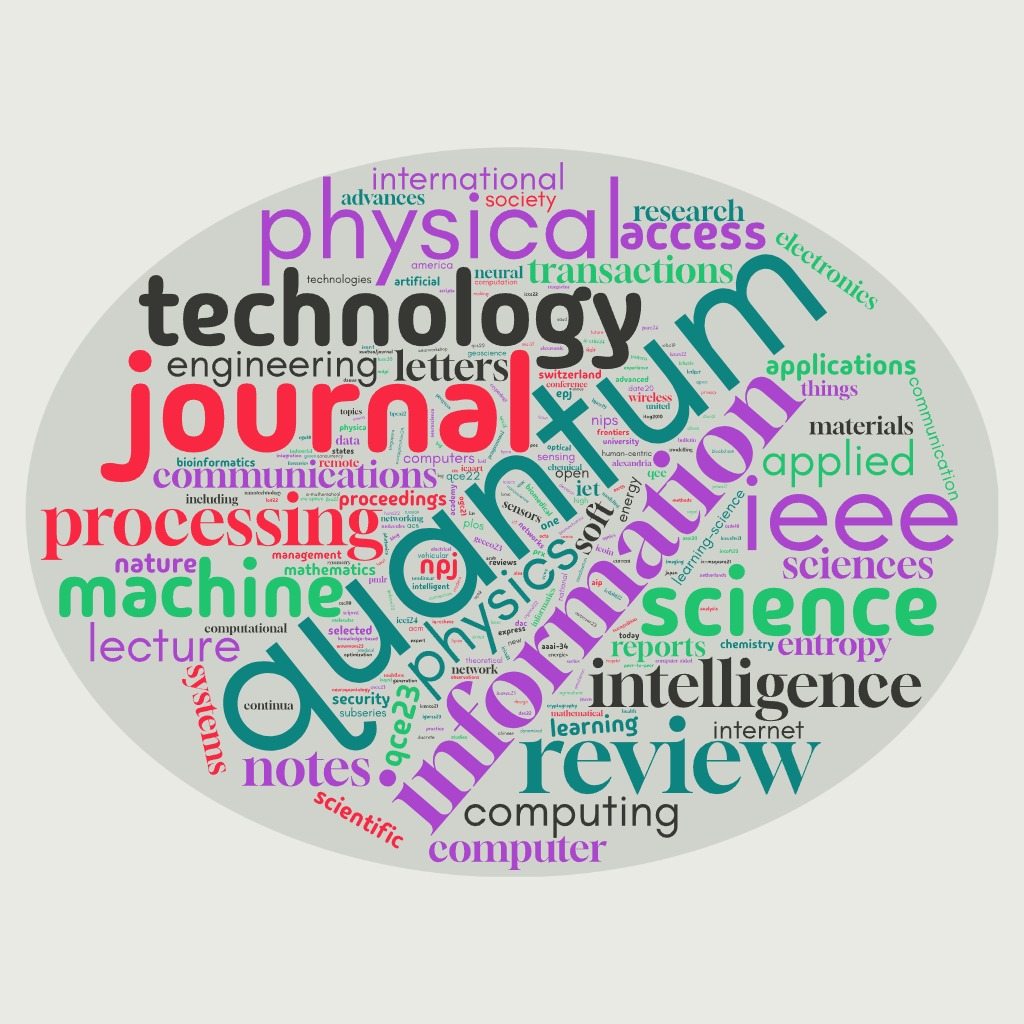

In [ ]:
from IPython import display
display.Image('/content/drive/MyDrive/wordcloud.jpg')

# Task: Find some systematic review papers in computer sciences and investigate about how the articles using charts to visualize their results. (Ban Tran & RQ1 team)